In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# import dataset
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


train = pd.read_csv('/content/drive/MyDrive/airbnb-cs74/train.csv')
test = pd.read_csv('/content/drive/MyDrive/airbnb-cs74/test.csv')

trainDF = pd.DataFrame(train)
testDF = pd.DataFrame(test)

# Change each neighbourhood group to corresponding numerical variable
neighbourhood_group_mapping = {
    'Brooklyn': 1,
    'Bronx': 2,
    'Manhattan': 3,
    'Queens': 4,
    'Staten Island': 5
}

# Map the values in 'neighbourhood_group' to labels
trainDF['neighbourhood_group'] = trainDF['neighbourhood_group'].map(neighbourhood_group_mapping)
testDF['neighbourhood_group'] = testDF['neighbourhood_group'].map(neighbourhood_group_mapping)


# do the same with room type
roomtype_group_mapping = {
    'Hotel room': 4,
    'Entire home/apt': 3,
    'Private room': 2,
    'Shared room': 1,
}

trainDF['room_type'] = trainDF['room_type'].map(roomtype_group_mapping)
testDF['room_type'] = testDF['room_type'].map(roomtype_group_mapping)

trainDF

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,price
0,a922764,Top Floor 2bd Luxury Brownstone Apt,1204785,Lorrie,1,Fort Greene,40.686010,-73.975150,3,30,277,2022-07-23,2.28,1,288,1,NaN,199
1,a16365302,Bond Street 2 bedroom 2 bath great NOHO location,24074171,Donna,3,NoHo,40.726930,-73.993220,3,3,37,2020-11-30,0.50,1,4,0,NaN,432
2,a2432622,Your new happy place in Greenpoint/Williamsburg,377287,Marianne,1,Greenpoint,40.723580,-73.954260,3,2,25,2022-04-23,0.24,1,134,3,NaN,400
3,a2525956,Beautiful 1 Bdr in the heart of NYC,7365834,Alex,3,Theater District,40.760380,-73.981960,3,30,16,2017-12-01,0.15,5,70,0,NaN,129
4,a34340299,Spacious 1 bed apartment with private terrace,41213523,Mathieu,3,East Village,40.728990,-73.980910,3,30,7,2020-01-02,0.15,1,0,0,NaN,250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16216,a19028078,Elegant Guest Room A,44547688,Carol,1,East New York,40.670870,-73.878240,2,30,22,2022-07-05,0.32,2,365,1,NaN,52
16217,a688505075508176871,"Central Park and River: Washer, Desk, Closet, AC",332212831,Patti And Kat,3,Upper West Side,40.799780,-73.963660,2,3,6,2023-01-01,0.88,2,245,6,NaN,105
16218,a14452731,Cozy room just 15 mins from Central Park,8616291,Chikie,3,Harlem,40.822540,-73.950560,2,3,156,2023-02-18,1.95,2,181,28,NaN,89
16219,a4885673,Stylish Shared Apt w Large Private Room,24943630,Jason,3,Greenwich Village,40.733820,-73.996830,2,6,57,2022-12-03,0.57,1,120,21,NaN,125


In [5]:
# Play with last review column

# Convert to datetime using pd
trainDF['last_review'] = pd.to_datetime(trainDF['last_review'])

# Extract year, month, and day
trainDF['last_review_year'] = trainDF['last_review'].dt.year
trainDF['last_review_month'] = trainDF['last_review'].dt.month
trainDF['last_review_day'] = trainDF['last_review'].dt.day

# implement same modifications on test df
testDF['last_review'] = pd.to_datetime(testDF['last_review'])

# Extract year, month, and day
testDF['last_review_year'] = testDF['last_review'].dt.year
testDF['last_review_month'] = testDF['last_review'].dt.month
testDF['last_review_day'] = testDF['last_review'].dt.day

trainDF.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,price,last_review_year,last_review_month,last_review_day
0,a922764,Top Floor 2bd Luxury Brownstone Apt,1204785,Lorrie,1,Fort Greene,40.68601,-73.97515,3,30,...,2022-07-23,2.28,1,288,1,NaN,199,2022,7,23
1,a16365302,Bond Street 2 bedroom 2 bath great NOHO location,24074171,Donna,3,NoHo,40.72693,-73.99322,3,3,...,2020-11-30,0.50,1,4,0,NaN,432,2020,11,30
2,a2432622,Your new happy place in Greenpoint/Williamsburg,377287,Marianne,1,Greenpoint,40.72358,-73.95426,3,2,...,2022-04-23,0.24,1,134,3,NaN,400,2022,4,23
3,a2525956,Beautiful 1 Bdr in the heart of NYC,7365834,Alex,3,Theater District,40.76038,-73.98196,3,30,...,2017-12-01,0.15,5,70,0,NaN,129,2017,12,1
4,a34340299,Spacious 1 bed apartment with private terrace,41213523,Mathieu,3,East Village,40.72899,-73.98091,3,30,...,2020-01-02,0.15,1,0,0,NaN,250,2020,1,2


In [ ]:
# Scale latitude
from sklearn.preprocessing import StandardScaler

# Select columns
cols = ['latitude']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the selected columns
trainDF[cols] = scaler.fit_transform(trainDF[cols])
testDF[cols] = scaler.fit_transform(testDF[cols])

In [ ]:
# drop irrelevant, non-numeric, or NA columns
text_columns = ["name", "host_name", "last_review", "license"] # license is all na values

# drop some troublesome columns for now
for column in text_columns:
    # drop text columns
    trainDF.drop(column, axis=1, inplace=True)
    testDF.drop(column, axis=1, inplace=True)




In [ ]:
# Percentage of reviews that are LTM (Last Twelve Months)
trainDF['pct_reviews_ltm'] = trainDF['number_of_reviews_ltm'] / trainDF['number_of_reviews']
testDF['pct_reviews_ltm'] = testDF['number_of_reviews_ltm'] / testDF['number_of_reviews']

<ipython-input-9-8705fc37d0ef>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = trainDF.corr()


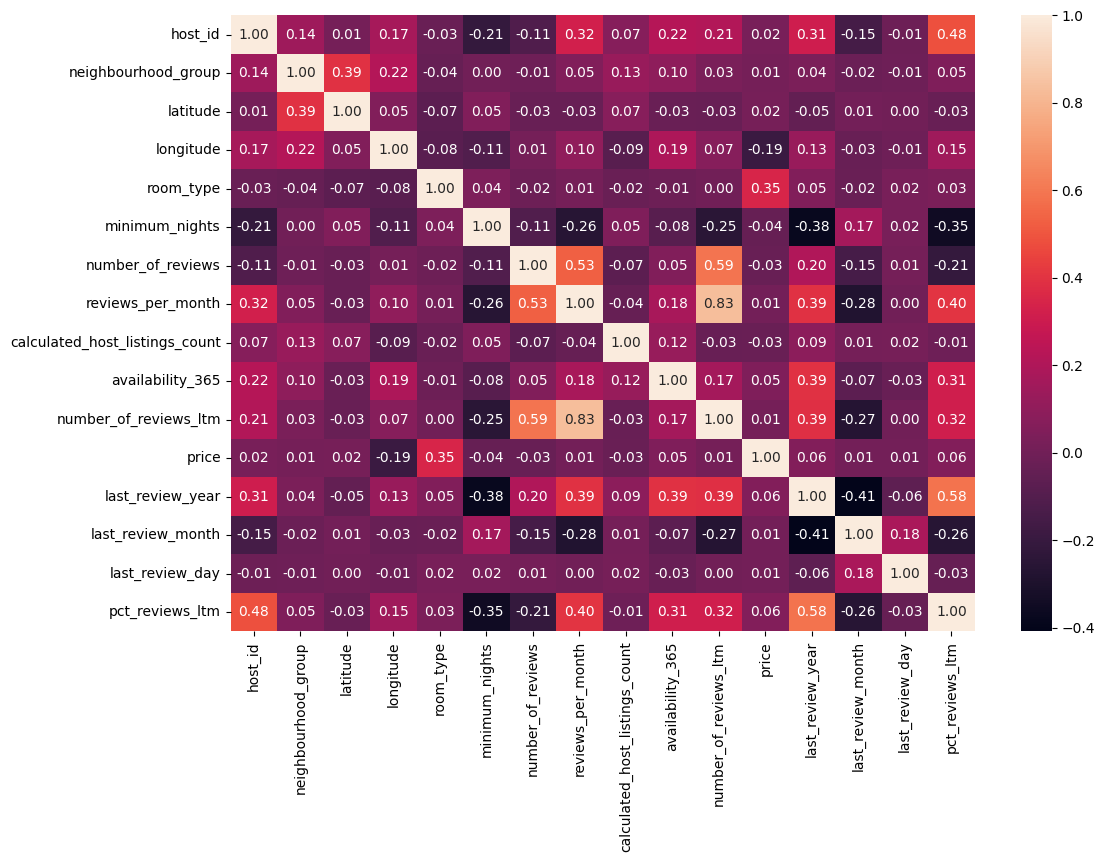

In [ ]:
# Create a correlation matrix to investigate most correlated features
import seaborn as sns

correlation_matrix = trainDF.corr()

# create fig
plt.figure(figsize=(12, 8))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")

plt.show()

In [ ]:
# PROCESS to get one-hot encoding for 'neighbourhood': combine train and test, encode them, then split again
# Combine train and test
combined_data = pd.concat([trainDF, testDF], axis=0)

# Perform one-hot encoding for 'neighbourhood'
combined_data = pd.get_dummies(combined_data, columns=['neighbourhood'], prefix='neighbourhood')

# Split combined data back into train and test
trainDF = combined_data[:len(trainDF)]
testDF = combined_data[len(trainDF):]


# we don't want price on the test thing, despite it being on train
testDF = testDF.drop("price", axis = 1)

In [ ]:
# Split into training and validation sets
X = trainDF.drop("price", axis=1)
y = trainDF["price"]
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=300, max_features=50, random_state=42)
rf_model.fit(X_train.drop(["id"], axis = 1), y_train)
rf_predictions = rf_model.predict(X_valid.drop(["id"], axis = 1))

# measure model on validation set
rf_rmse = mean_squared_error(y_valid, rf_predictions, squared=False)
print("SCORE: ", rf_rmse)

SCORE:  117.60935429332602


In [ ]:
# CREATE SUBMISSION

submit_pred = rf_model.predict(testDF.drop("id", axis=1))

submission_data = {'id':testDF['id'], 'price':submit_pred}
submission_df = pd.DataFrame(submission_data)
submission_df



,id,price
0,a15723889,192.680000
1,a40861640,201.356667
2,a27466647,254.640000
3,a50643073,95.663333
4,a8953200,71.960000
...,...,...
5402,a14110144,162.646667
5403,a7769782,61.406667
5404,a19066190,54.766667
5405,a53572965,69.206667


In [ ]:
# save to csv for submission
submission_df.to_csv("airbnb_submission8.csv", index=False)
